<a href="https://colab.research.google.com/github/zhaoyanxue666/health/blob/main/%E5%BF%83%E7%90%86%E6%88%90%E7%BB%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 进行（2020-2023）四个文件的数据合并，并合并为一个excel 文件





In [57]:
import pandas as pd
df_2020 = pd.read_excel('2020年测试的副本-删除学号.xlsx')
df_2021 = pd.read_excel('2021年测试的副本-删除学号.xlsx')
df_2022 = pd.read_excel('2022年测试的副本-删除学号.xlsx')
df_2023 = pd.read_excel('2023年测试的副本-删除学号.xlsx')

## 合并数据集：
使用pd.concat()函数将这些数据框（DataFrame）合并成一个单一的数据框。你需要传递一个包含所有数据框的列表，并指定axis=0来按行合并：

In [58]:
combined_df = pd.concat([df_2020, df_2021, df_2022, df_2023], axis=0)

重置索引（如果需要）：
合并后的数据框可能需要重置索引，以避免索引不连续的问题：

In [59]:
combined_df.reset_index(drop=True, inplace=True)

保存合并后的数据集（如果需要）：
你可以将合并后的数据框保存到一个新的Excel文件中，以便进一步分析或存档：



In [60]:
combined_df.to_excel('combined_data.xlsx', index=False)

In [61]:
# prompt: 显示合并后的数据集

print(combined_df['测评结果'] )


0             第2类结果：可能有心理问题,应该引起关注！
1        第1类结果：有明显的心理问题,请尽快到咨询机构面谈！
2             第2类结果：可能有心理问题,应该引起关注！
3        第1类结果：有明显的心理问题,请尽快到咨询机构面谈！
4        第1类结果：有明显的心理问题,请尽快到咨询机构面谈！
                    ...            
42628         第2类结果：可能有心理问题,应该引起关注！
42629                   第3类结果：心理健康！
42630                   第3类结果：心理健康！
42631    第1类结果：有明显的心理问题,请尽快到咨询机构面谈！
42632    第1类结果：有明显的心理问题,请尽快到咨询机构面谈！
Name: 测评结果, Length: 42633, dtype: object


## 数据清洗：
如果需要，你可以在这一步进行数据清洗，比如将测评结果的文本分类转换为数值： 先备份以下（re_combined_df）

In [65]:
re_combined_df = combined_df.copy()

print(re_combined_df)

                   学院名称    年级  性别（1男2女）                        测评结果  \
0                电气工程学院  2020         1       第2类结果：可能有心理问题,应该引起关注！   
1                机械工程学院  2020         1  第1类结果：有明显的心理问题,请尽快到咨询机构面谈！   
2                   医学院  2020         1       第2类结果：可能有心理问题,应该引起关注！   
3                机械工程学院  2020         1  第1类结果：有明显的心理问题,请尽快到咨询机构面谈！   
4                   法学院  2020         1  第1类结果：有明显的心理问题,请尽快到咨询机构面谈！   
...                 ...   ...       ...                         ...   
42628             外国语学院  2023         2       第2类结果：可能有心理问题,应该引起关注！   
42629  经济学院、中国-东盟金融合作学院  2023         1                 第3类结果：心理健康！   
42630        计算机与电子信息学院  2023         1                 第3类结果：心理健康！   
42631               文学院  2023         2  第1类结果：有明显的心理问题,请尽快到咨询机构面谈！   
42632         轻工与食品工程学院  2023         2  第1类结果：有明显的心理问题,请尽快到咨询机构面谈！   

                 判断依据1                   判断依据2            判断依据3  \
0                  NaN  第八题做肯定回答：自己的过去和家庭是不幸的。              NaN   
1            

In [98]:
re_combined_df['测评结果'] = re_combined_df['测评结果'].map({
    '第1类结果：有明显的心理问题,请尽快到咨询机构面谈！': 1,
    '第2类结果：可能有心理问题,应该引起关注！': 2,
    '第3类结果：心理健康！': 3
})
print(re_combined_df)

                   学院名称    年级  性别（1男2女）  测评结果            判断依据1  \
0                电气工程学院  2020         1     2              NaN   
1                机械工程学院  2020         1     1              NaN   
2                   医学院  2020         1     2              NaN   
3                机械工程学院  2020         1     1  第二十五题做肯定回答：想轻生。   
4                   法学院  2020         1     1              NaN   
...                 ...   ...       ...   ...              ...   
42628             外国语学院  2023         2     2              NaN   
42629  经济学院、中国-东盟金融合作学院  2023         1     3              NaN   
42630        计算机与电子信息学院  2023         1     3              NaN   
42631               文学院  2023         2     1              NaN   
42632         轻工与食品工程学院  2023         2     1              NaN   

                        判断依据2            判断依据3                   判断依据4  \
0      第八题做肯定回答：自己的过去和家庭是不幸的。              NaN                     NaN   
1      第八题做肯定回答：自己的过去和家庭是不幸的。  第十六题做肯定回答：常常失眠。             

## 保存数据

In [64]:
re_combined_df.to_excel('recombined_data.xlsx', index=False)

# 描述性统计分析：


## 1.Python的pandas和统计库（如statsmodels）来计算平均值、中位数、标准差等统计指标。

In [27]:
descriptive_stats = re_combined_df.describe()
print(descriptive_stats)

                 年级      性别（1男2女）          测评结果          最终得分            学号
count  42633.000000  42633.000000  42633.000000  42633.000000  1.074600e+04
mean    2021.506626      1.442568      2.427064      8.948796  2.213600e+09
std        1.129165      0.496696      0.752170      9.418358  7.751908e+07
min     2020.000000      1.000000      1.000000      0.000000  2.022000e+07
25%     2020.000000      1.000000      2.000000      2.000000  2.207210e+09
50%     2022.000000      1.000000      3.000000      6.000000  2.213593e+09
75%     2023.000000      2.000000      3.000000     13.000000  2.224110e+09
max     2023.000000      2.000000      3.000000     56.000000  2.243200e+09


##2.计算特定列的统计指标：
如果你只对特定列感兴趣，比如“最终得分”、“测评结果”，可以使用以下代码：

In [32]:
score_stats = re_combined_df[['最终得分']].describe()

print(f"最终得分:{score_stats}")
score_stats = re_combined_df[['测评结果']].describe()

print(f"测评结果:{score_stats}")

最终得分:               最终得分
count  42633.000000
mean       8.948796
std        9.418358
min        0.000000
25%        2.000000
50%        6.000000
75%       13.000000
max       56.000000
测评结果:               测评结果
count  42633.000000
mean       2.427064
std        0.752170
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000


## 3.计算中位数和标准差：
使用pandas的.median()和.std()方法：

In [34]:
median_score = re_combined_df['最终得分'].median()
std_dev_score = re_combined_df['最终得分'].std()
print(f"最终得分Median Score: {median_score}")
print(f"最终得分Standard Deviation of Score: {std_dev_score}")

median_score = re_combined_df['测评结果'].median()
std_dev_score = re_combined_df['测评结果'].std()
print(f"测评结果Median Score: {median_score}")
print(f"测评结果Standard Deviation of Score: {std_dev_score}")

最终得分Median Score: 6.0
最终得分Standard Deviation of Score: 9.41835766846862
测评结果Median Score: 3.0
测评结果Standard Deviation of Score: 0.7521697844330063


# 分组分析

## 1.根据学院名称分组，并计算每个学院的平均得分

In [ ]:
mean_scores_by_college = re_combined_df.groupby('学院名称')['最终得分'].mean()
print(mean_scores_by_college)

In [ ]:
mean_scores_by_college = re_combined_df.groupby('学院名称')['测评结果'].mean()
print(mean_scores_by_college)

##  2.根据年级和性别分组，并计算每个组合的平均得分


In [42]:
mean_scores_by_grade_gender = re_combined_df.groupby(['年级', '性别（1男2女）'])['最终得分'].mean()
print(mean_scores_by_grade_gender)

年级    性别（1男2女）
2020  1            9.870828
      2           11.971757
2021  1            7.574156
      2            9.844628
2022  1            6.987211
      2            8.536660
2023  1            7.749675
      2            9.840943
Name: 最终得分, dtype: float64



## 3.分析心理问题分布.根据学院名称分组，并计算每个学院的心理问题分布

In [43]:
psychological_issues_distribution = re_combined_df.groupby('学院名称')['测评结果'].value_counts(normalize=True).unstack().fillna(0)
print("\n心理问题分布按学院名称分组：")
print(psychological_issues_distribution)


心理问题分布按学院名称分组：
测评结果                     1         2         3
学院名称                                          
体育学院              0.138462  0.269231  0.592308
公共管理学院            0.194251  0.252613  0.553136
农学院               0.166606  0.256957  0.576437
动物科学技术学院          0.163942  0.261093  0.574965
化学化工学院            0.151318  0.256752  0.591930
医学院               0.144011  0.269179  0.586810
商学院               0.155502  0.210526  0.633971
国际学院              0.292857  0.278571  0.428571
土木建筑工程学院          0.138189  0.262372  0.599440
外国语学院             0.258528  0.266607  0.474865
工商管理学院            0.197982  0.257881  0.544136
数学与信息科学学院         0.150845  0.226268  0.622887
文学院               0.218504  0.251969  0.529528
新闻与传播学院           0.231707  0.243902  0.524390
机械工程学院            0.127817  0.240824  0.631359
林学院               0.167435  0.249616  0.582949
法学院               0.190349  0.250223  0.559428
海洋学院              0.189498  0.260274  0.550228
物理科学与工程技术学院       0.142197  0.246407  0.6113

## 4.年级和性别分组的心理问题分布

In [45]:
psychological_issues_distribution_by_grade_gender = re_combined_df.groupby(['年级', '性别（1男2女）'])['测评结果'].value_counts(normalize=True).unstack().fillna(0)

# 打印结果
print("\n心理问题分布按年级和性别分组：")
print(psychological_issues_distribution_by_grade_gender)


心理问题分布按年级和性别分组：
测评结果                  1         2         3
年级   性别（1男2女）                              
2020 1         0.199266  0.256008  0.544726
     2         0.260440  0.260440  0.479120
2021 1         0.121880  0.230727  0.647394
     2         0.179996  0.252343  0.567662
2022 1         0.099725  0.251578  0.648697
     2         0.145984  0.265704  0.588313
2023 1         0.113533  0.253416  0.633051
     2         0.186829  0.246581  0.566590


In [52]:
print(re_combined_df.dtypes)  # 查看DataFrame中各列的数据类型

学院名称         object
年级            int64
性别（1男2女）      int64
测评结果          int64
判断依据1        object
判断依据2        object
判断依据3        object
判断依据4        object
判断依据5        object
判断依据6        object
判断依据7        object
最终得分          int64
学号          float64
dtype: object


##5.多重比较


In [56]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 假设 re_combined_df 是你的 DataFrame

# 根据年级和性别分组，并计算每个组的最终得分的平均值和标准差
grouped_stats = re_combined_df.groupby(['年级', '性别（1男2女）'])['最终得分'].agg(['mean', 'std']).reset_index()

# 打印分组统计结果
print(grouped_stats)

# 提取每个组的最终得分列表，用于方差分析
score_groups = [group['最终得分'].values for _, group in re_combined_df.groupby(['年级', '性别（1男2女）'])]

# 计算 F 值和 P 值
f_value, p_value = f_oneway(*score_groups)

# 打印方差分析结果
print(f"F-value: {f_value}, P-value: {p_value}")

# 如果 P 值小于显著性水平（例如 0.05），进行多重比较
if p_value < 0.05:
    # 创建一个新的列作为分组标识符
    re_combined_df['group_id'] = re_combined_df['年级'].astype(str) + re_combined_df['性别（1男2女）'].map({1: '男', 2: '女'})

    # 使用最终得分和分组标识符进行 Tukey's HSD 事后检验
    tukey_result = pairwise_tukeyhsd(endog=re_combined_df['最终得分'], groups=re_combined_df['group_id'], alpha=0.05)
    print(tukey_result)

     年级  性别（1男2女）       mean        std
0  2020         1   9.870828  10.359568
1  2020         2  11.971757  10.672542
2  2021         1   7.574156   8.330581
3  2021         2   9.844628   9.398337
4  2022         1   6.987211   8.138077
5  2022         2   8.536660   8.836768
6  2023         1   7.749675   8.757676
7  2023         2   9.840943   9.755381
F-value: 168.00644540794497, P-value: 2.8761763362653564e-246
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 2020女  2020男  -2.1009    0.0 -2.6417 -1.5602   True
 2020女  2021女  -2.1271    0.0 -2.7041 -1.5502   True
 2020女  2021男  -4.3976    0.0 -4.9504 -3.8448   True
 2020女  2022女  -3.4351    0.0 -4.0127 -2.8575   True
 2020女  2022男  -4.9845    0.0 -5.5216 -4.4475   True
 2020女  2023女  -2.1308    0.0 -2.7026 -1.5591   True
 2020女  2023男  -4.2221    0.0 -4.7597 -3.6845   True
 2020男  2021女  -0.0262    1.0 -0.5787  0.5263  F

# 数据可视化

## 1.绘制不同年级和性别的最终得分箱型图

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


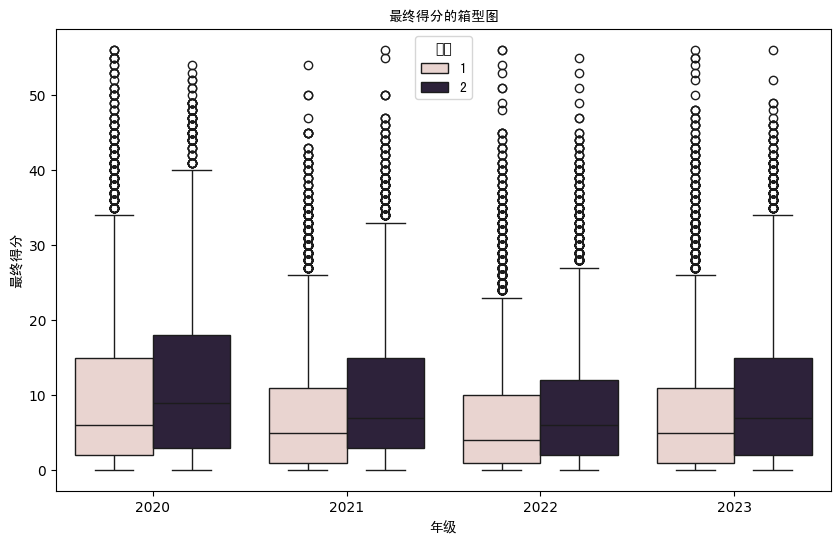

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager

# 指定字体路径
font_path = 'simhei.ttf'  # 请确保这是正确的字体文件路径

# 注册字体
font_prop = font_manager.FontProperties(fname=font_path)

# 设置matplotlib的字体配置
plt.rcParams['font.sans-serif'] = ['simhei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 绘制箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(x='年级', y='最终得分', hue='性别（1男2女）', data=re_combined_df)

# 设置图表标题和其他文本元素的字体
plt.title('最终得分的箱型图', fontproperties=font_prop)
plt.xlabel('年级', fontproperties=font_prop)
plt.ylabel('最终得分', fontproperties=font_prop)
plt.legend(title='性别', prop=font_prop)

# 显示图表
plt.show()

##2.绘制不同年级和性别的最终得分分布图

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


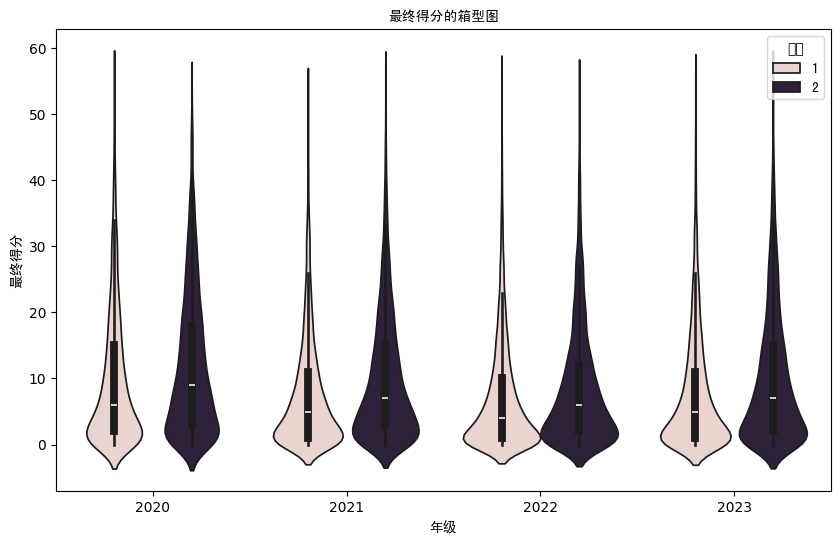

In [81]:
# 绘制小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='年级', y='最终得分', hue='性别（1男2女）', data=re_combined_df)
plt.title('最终得分的小提琴图')
# 设置图表标题和其他文本元素的字体
plt.title('最终得分的小提琴图', fontproperties=font_prop)
plt.xlabel('年级', fontproperties=font_prop)
plt.ylabel('最终得分', fontproperties=font_prop)
plt.legend(title='性别', prop=font_prop)
plt.show()

## 3.分析不同年级随时间的得分趋势

<ipython-input-123-7227ccd003b7>:11: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=re_combined_df, x='年级', y='最终得分', hue='性别（1男2女）', style='性别（1男2女）', markers="o")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


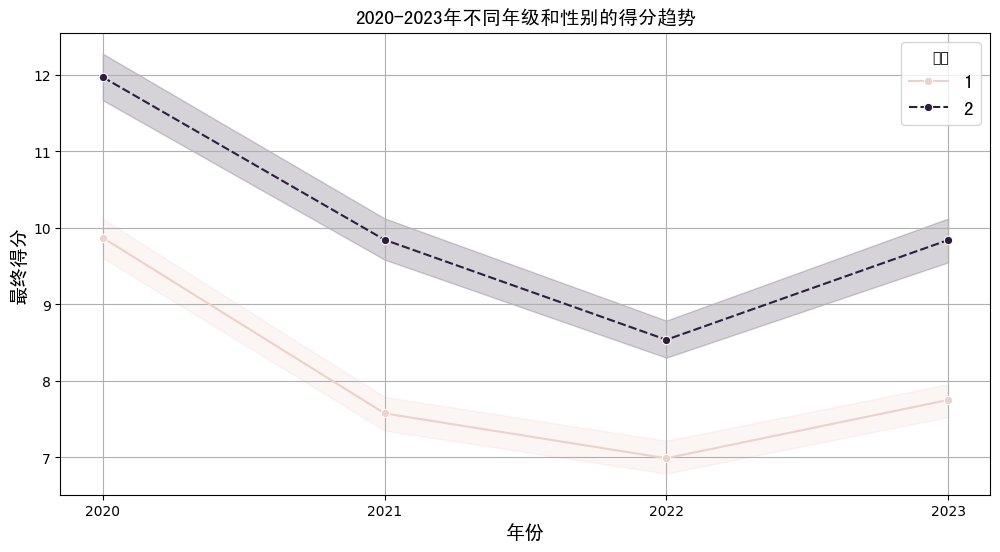

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文支持的字体
plt.rcParams['font.sans-serif'] = ['simhei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 绘制得分趋势图
plt.figure(figsize=(12, 6))
# 使用lineplot来绘制趋势，注意这里假设年级和性别已经是适当的格式
sns.lineplot(data=re_combined_df, x='年级', y='最终得分', hue='性别（1男2女）', style='性别（1男2女）', markers="o")
plt.title('2020-2023年不同年级和性别的得分趋势', fontproperties=font_prop)
plt.xlabel('年份', fontproperties=font_prop)
plt.ylabel('最终得分', fontproperties=font_prop)
plt.legend(title='性别', prop=font_prop)
plt.grid(True)
# 设置x轴刻度间隔为1
plt.xticks(range(int(re_combined_df['年级'].min()), int(re_combined_df['年级'].max()) + 1, 1))

plt.show()

## 4.相关性分析

In [99]:
# 计算相关系数
correlation = re_combined_df[['年级', '性别（1男2女）', '最终得分','测评结果']].corr()
print(correlation)

                年级  性别（1男2女）      最终得分      测评结果
年级        1.000000 -0.018445 -0.089930  0.083734
性别（1男2女） -0.018445  1.000000  0.107569 -0.085943
最终得分     -0.089930  0.107569  1.000000 -0.689160
测评结果      0.083734 -0.085943 -0.689160  1.000000


## 5.绘制相关热图

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
  fig.canvas.draw()
/usr

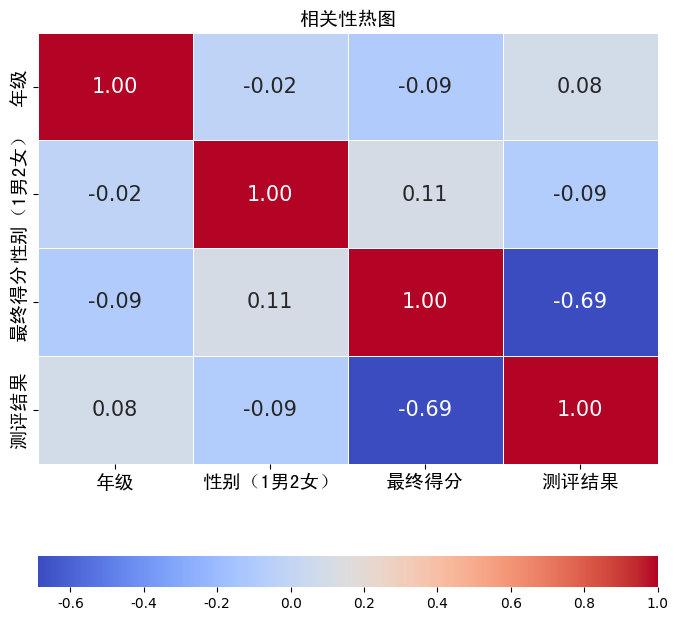

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 指定中文字体路径，以微软雅黑为例（根据你的系统安装字体进行选择）
font_path = "simhei.ttf"
font_prop = FontProperties(fname=font_path, size=14)

# 绘制相关性热图
plt.figure(figsize=(8, 8))

# 绘制热图，设置中文字体, 删除font_scale参数
ax = sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={'fontsize': 15},
            yticklabels=correlation.index.values,
            xticklabels=correlation.columns.values,
            linewidths=.5,   # 单元格间距
            cbar_kws={"orientation": "horizontal"})  # 调整色标方向

# 设置标题，使用指定的中文字体
plt.title('相关性热图', fontproperties=font_prop)


# 遍历y轴刻度标签，设置字体
for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)


# 遍历x轴刻度标签，设置字体
for label in ax.get_xticklabels():
    label.set_fontproperties(font_prop)

# 显示图表
plt.show()